# 📊 Análisis de Resultados - Modelos de Clasificación
## Evaluación Parcial 2 - Machine Learning

**Proyecto:** Predicción y Preparación de Pandemias  
**Objetivo:** Clasificar países en niveles de preparación (Low, Medium, High)  
**Modelos evaluados:** 5 algoritmos de clasificación supervisada

---

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from pathlib import Path

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configurar tamaño de figuras
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Librerías importadas exitosamente")

✅ Librerías importadas exitosamente


## 1. Carga de Datos

In [2]:
# Detectar directorio del proyecto
import os
from pathlib import Path

# Buscar el directorio raíz del proyecto (donde está pyproject.toml o setup.py)
current_dir = Path.cwd()
project_root = current_dir

# Si estamos en notebooks/, subir un nivel
if current_dir.name == 'notebooks':
    project_root = current_dir.parent

# Si no encontramos data/, intentar buscar hacia arriba
if not (project_root / 'data').exists():
    for parent in current_dir.parents:
        if (parent / 'data').exists():
            project_root = parent
            break

print(f"📁 Directorio del proyecto: {project_root}")
print(f"📁 Directorio actual: {current_dir}")

# Rutas de archivos
comparison_path = project_root / 'data' / '07_model_output' / 'classification_comparison.csv'
metrics_path = project_root / 'data' / '07_model_output' / 'classification_metrics.json'

# Verificar que existan los archivos
if not comparison_path.exists():
    raise FileNotFoundError(f"No se encontró: {comparison_path}\n\n" 
                          f"⚠️ SOLUCIÓN: Ejecuta este notebook desde el directorio raíz del proyecto\n"
                          f"   o desde la carpeta notebooks/")

if not metrics_path.exists():
    raise FileNotFoundError(f"No se encontró: {metrics_path}")

# Cargar tabla comparativa
df_comparison = pd.read_csv(comparison_path)

# Cargar métricas detalladas
with open(metrics_path, 'r') as f:
    metrics = json.load(f)

print(f"\n✅ Datos cargados exitosamente")
print(f"   Archivo: {comparison_path.name}")
print(f"   Modelos evaluados: {len(df_comparison)}")
print(f"   Métricas disponibles: {len(metrics)} modelos")

📁 Directorio del proyecto: D:\Maching\prediccion-pandemias\prediccion-preparacion-pandemias
📁 Directorio actual: D:\Maching\prediccion-pandemias\prediccion-preparacion-pandemias\notebooks

✅ Datos cargados exitosamente
   Archivo: classification_comparison.csv
   Modelos evaluados: 5
   Métricas disponibles: 5 modelos


## 2. Vista General de Resultados

In [3]:
# Mostrar tabla completa ordenada por Test Accuracy
df_sorted = df_comparison.sort_values('Test_Accuracy', ascending=False)

print("="*80)
print("RANKING DE MODELOS - CLASIFICACIÓN")
print("="*80)
print()

for idx, row in df_sorted.iterrows():
    rank = idx + 1
    emoji = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉" if rank == 3 else "  "
    print(f"{emoji} {rank}. {row['Model']}")
    print(f"   Test Accuracy: {row['Test_Accuracy']:.4f} ({row['Test_Accuracy']*100:.2f}%)")
    print(f"   CV Score: {row['CV_Score (mean±std)']}")
    print(f"   Training Time: {row['Training_Time(s)']:.2f}s ({row['Training_Time(s)']/60:.2f} min)")
    print()

# Mostrar DataFrame
display(df_sorted[['Model', 'Test_Accuracy', 'Test_F1_Weighted', 'Training_Time(s)']].style.background_gradient(cmap='RdYlGn', subset=['Test_Accuracy', 'Test_F1_Weighted']))

RANKING DE MODELOS - CLASIFICACIÓN

🥇 1. Random Forest
   Test Accuracy: 0.9995 (99.95%)
   CV Score: 0.9989±0.0002
   Training Time: 120.34s (2.01 min)

🥈 2. Gradient Boosting
   Test Accuracy: 0.9984 (99.84%)
   CV Score: 0.9981±0.0003
   Training Time: 1727.62s (28.79 min)

🥉 3. XGBoost
   Test Accuracy: 0.9979 (99.79%)
   CV Score: 0.9974±0.0001
   Training Time: 23.43s (0.39 min)

   4. SVM
   Test Accuracy: 0.9916 (99.16%)
   CV Score: 0.9893±0.0004
   Training Time: 3110.74s (51.85 min)

   5. Logistic Regression
   Test Accuracy: 0.6514 (65.14%)
   CV Score: 0.6137±0.0021
   Training Time: 225.79s (3.76 min)



,Model,Test_Accuracy,Test_F1_Weighted,Training_Time(s)
0,Random Forest,0.999500,0.999500,120.340000
1,Gradient Boosting,0.998400,0.998400,1727.620000
2,XGBoost,0.997900,0.997900,23.430000
3,SVM,0.991600,0.991600,3110.740000
4,Logistic Regression,0.651400,0.610900,225.790000


## 3. Visualización: Comparación de Métricas

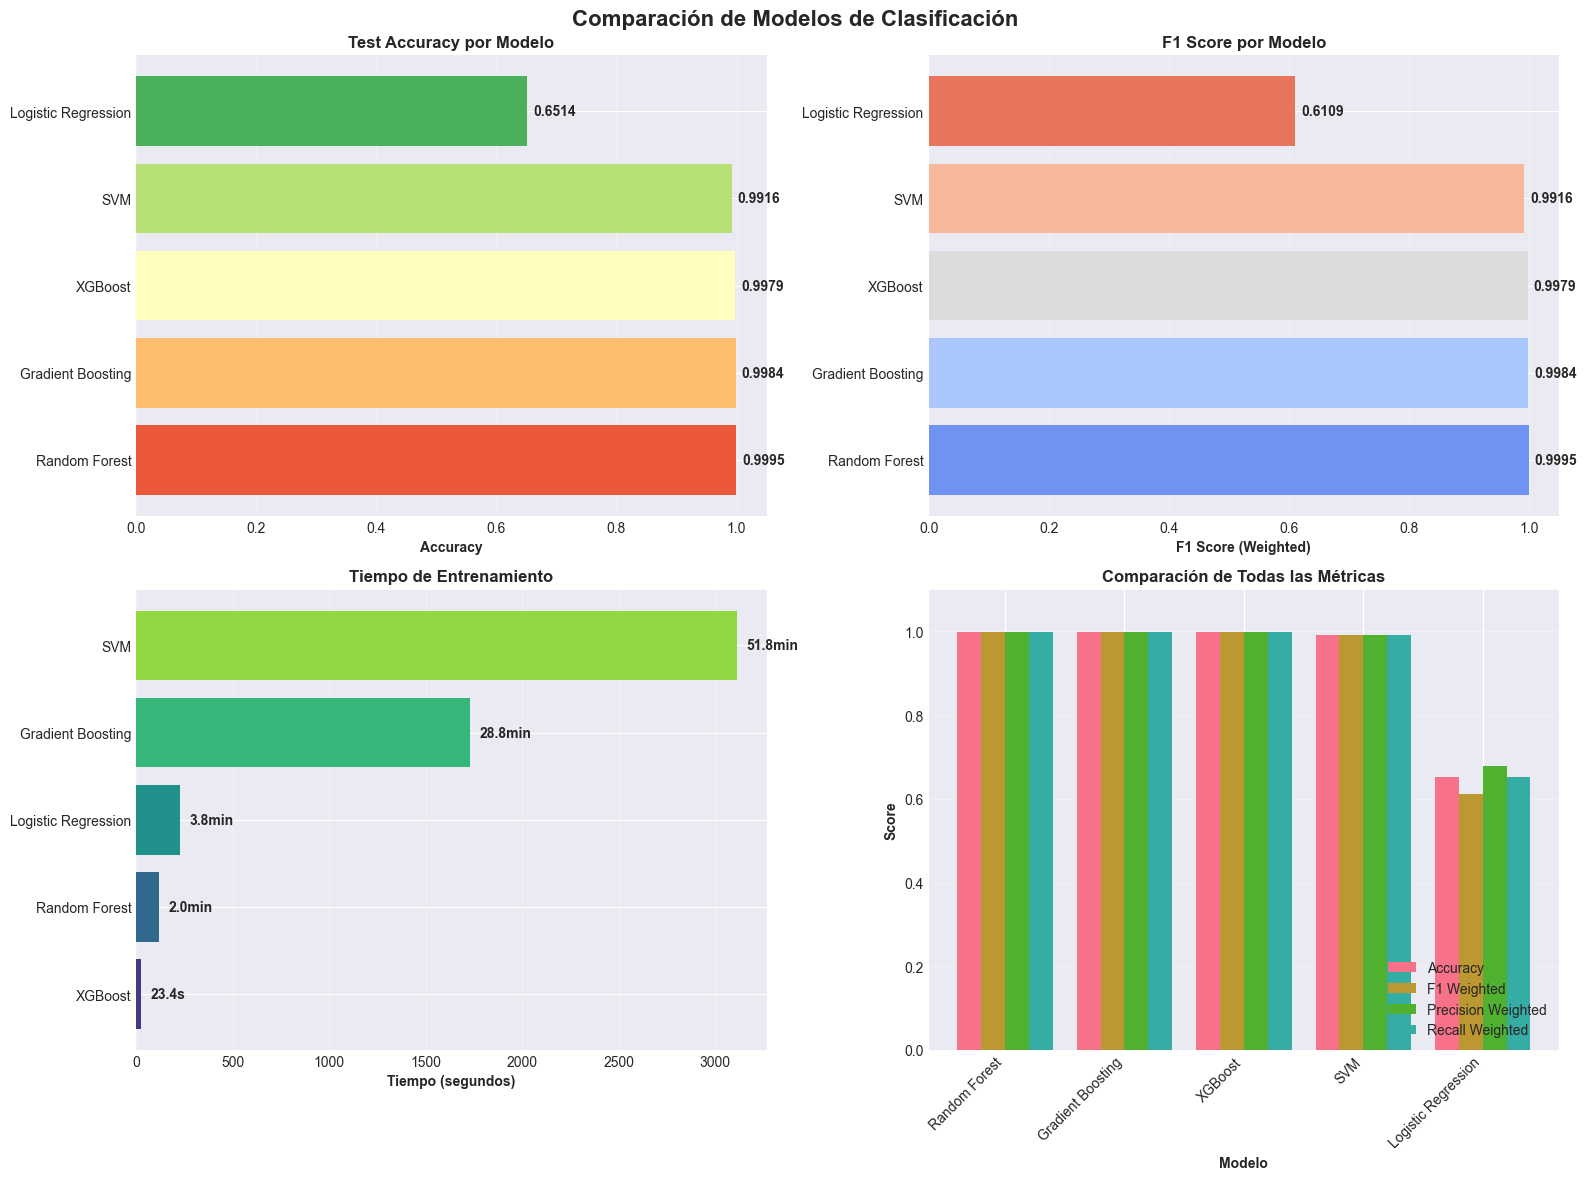

✅ Visualizaciones generadas


In [4]:
# Preparar datos para visualización
df_plot = df_sorted.copy()

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparación de Modelos de Clasificación', fontsize=16, fontweight='bold')

# 1. Test Accuracy
ax1 = axes[0, 0]
bars1 = ax1.barh(df_plot['Model'], df_plot['Test_Accuracy'], color=sns.color_palette('RdYlGn', len(df_plot)))
ax1.set_xlabel('Accuracy', fontweight='bold')
ax1.set_title('Test Accuracy por Modelo', fontweight='bold')
ax1.set_xlim(0, 1.05)
ax1.grid(axis='x', alpha=0.3)

# Añadir valores en las barras
for i, (bar, val) in enumerate(zip(bars1, df_plot['Test_Accuracy'])):
    ax1.text(val + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{val:.4f}', va='center', fontweight='bold')

# 2. F1 Weighted Score
ax2 = axes[0, 1]
bars2 = ax2.barh(df_plot['Model'], df_plot['Test_F1_Weighted'], color=sns.color_palette('coolwarm', len(df_plot)))
ax2.set_xlabel('F1 Score (Weighted)', fontweight='bold')
ax2.set_title('F1 Score por Modelo', fontweight='bold')
ax2.set_xlim(0, 1.05)
ax2.grid(axis='x', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars2, df_plot['Test_F1_Weighted'])):
    ax2.text(val + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{val:.4f}', va='center', fontweight='bold')

# 3. Training Time
ax3 = axes[1, 0]
df_time_sorted = df_plot.sort_values('Training_Time(s)')
bars3 = ax3.barh(df_time_sorted['Model'], df_time_sorted['Training_Time(s)'], 
                  color=sns.color_palette('viridis', len(df_plot)))
ax3.set_xlabel('Tiempo (segundos)', fontweight='bold')
ax3.set_title('Tiempo de Entrenamiento', fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars3, df_time_sorted['Training_Time(s)'])):
    minutes = val / 60
    label = f'{val:.1f}s' if val < 60 else f'{minutes:.1f}min'
    ax3.text(val + 50, bar.get_y() + bar.get_height()/2, 
             label, va='center', fontweight='bold')

# 4. Todas las métricas comparadas
ax4 = axes[1, 1]
metrics_to_plot = ['Test_Accuracy', 'Test_F1_Weighted', 'Test_Precision_Weighted', 'Test_Recall_Weighted']
x = np.arange(len(df_plot['Model']))
width = 0.2

for i, metric in enumerate(metrics_to_plot):
    offset = width * (i - 1.5)
    ax4.bar(x + offset, df_plot[metric], width, label=metric.replace('Test_', '').replace('_', ' '))

ax4.set_xlabel('Modelo', fontweight='bold')
ax4.set_ylabel('Score', fontweight='bold')
ax4.set_title('Comparación de Todas las Métricas', fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(df_plot['Model'], rotation=45, ha='right')
ax4.legend(loc='lower right')
ax4.grid(axis='y', alpha=0.3)
ax4.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()

print("✅ Visualizaciones generadas")

## 4. Análisis de Trade-offs: Rendimiento vs Tiempo

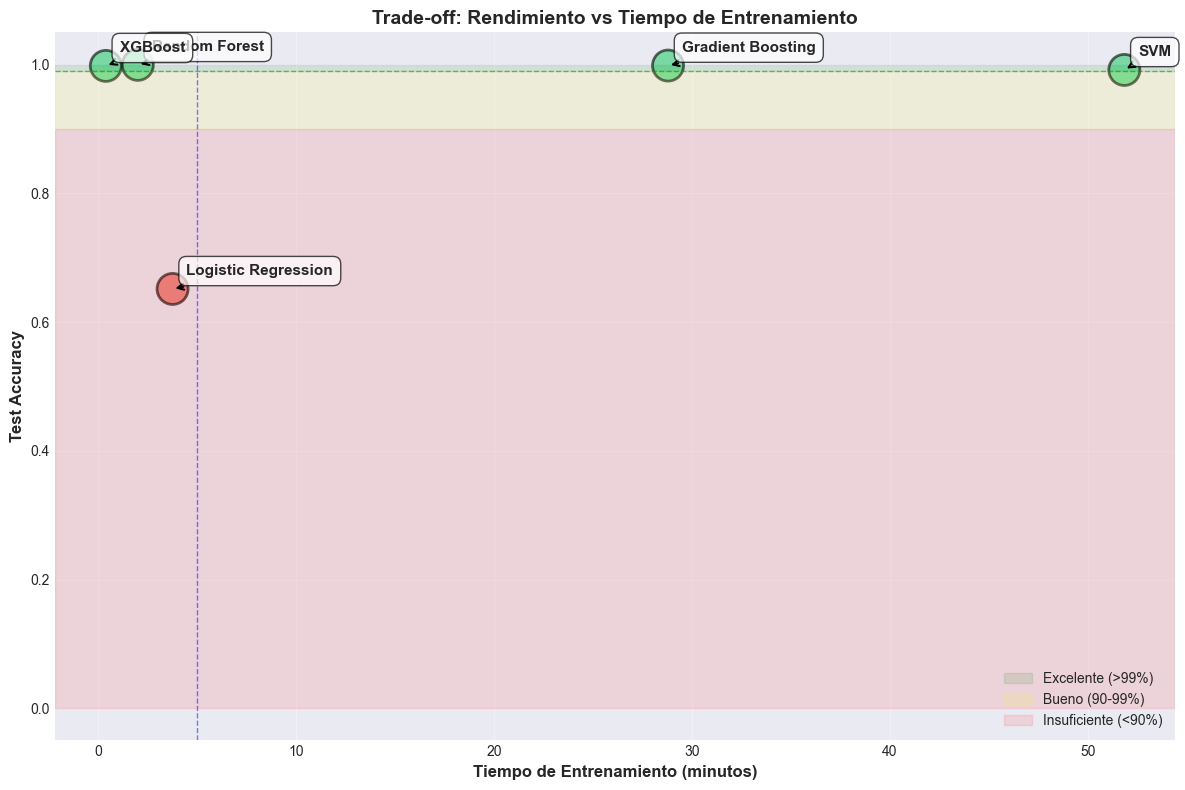


📊 ANÁLISIS DE TRADE-OFFS:

🟢 Zona Ideal (Alto rendimiento + Rápido): >99% accuracy, <5 min
   Modelos: Random Forest, XGBoost

🟡 Zona Aceptable (Alto rendimiento + Lento): >99% accuracy, >5 min
   Modelos: Gradient Boosting, SVM

🔴 Zona Problemática (Bajo rendimiento): <99% accuracy
   Modelos: Logistic Regression


In [5]:
# Gráfico de dispersión: Accuracy vs Training Time
fig, ax = plt.subplots(figsize=(12, 8))

# Convertir tiempo a minutos
df_plot['Training_Time_min'] = df_plot['Training_Time(s)'] / 60

# Crear scatter plot
colors = ['#2ecc71' if acc > 0.99 else '#f39c12' if acc > 0.90 else '#e74c3c' 
          for acc in df_plot['Test_Accuracy']]

scatter = ax.scatter(df_plot['Training_Time_min'], 
                     df_plot['Test_Accuracy'], 
                     s=500, 
                     c=colors, 
                     alpha=0.6, 
                     edgecolors='black', 
                     linewidth=2)

# Añadir etiquetas
for idx, row in df_plot.iterrows():
    ax.annotate(row['Model'], 
                xy=(row['Training_Time_min'], row['Test_Accuracy']),
                xytext=(10, 10),
                textcoords='offset points',
                fontsize=11,
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', lw=1.5))

# Zonas de desempeño
ax.axhspan(0.99, 1.0, alpha=0.1, color='green', label='Excelente (>99%)')
ax.axhspan(0.90, 0.99, alpha=0.1, color='yellow', label='Bueno (90-99%)')
ax.axhspan(0, 0.90, alpha=0.1, color='red', label='Insuficiente (<90%)')

ax.set_xlabel('Tiempo de Entrenamiento (minutos)', fontsize=12, fontweight='bold')
ax.set_ylabel('Test Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Trade-off: Rendimiento vs Tiempo de Entrenamiento', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(loc='lower right', fontsize=10)

# Añadir líneas de referencia
ax.axhline(y=0.99, color='green', linestyle='--', linewidth=1, alpha=0.5, label='Umbral 99%')
ax.axvline(x=5, color='blue', linestyle='--', linewidth=1, alpha=0.5, label='Umbral 5 min')

plt.tight_layout()
plt.show()

print("\n📊 ANÁLISIS DE TRADE-OFFS:")
print("="*60)
print("\n🟢 Zona Ideal (Alto rendimiento + Rápido): >99% accuracy, <5 min")
ideal = df_plot[(df_plot['Test_Accuracy'] > 0.99) & (df_plot['Training_Time_min'] < 5)]
if len(ideal) > 0:
    print(f"   Modelos: {', '.join(ideal['Model'].values)}")
else:
    print("   Ningún modelo en esta zona")

print("\n🟡 Zona Aceptable (Alto rendimiento + Lento): >99% accuracy, >5 min")
acceptable = df_plot[(df_plot['Test_Accuracy'] > 0.99) & (df_plot['Training_Time_min'] >= 5)]
if len(acceptable) > 0:
    print(f"   Modelos: {', '.join(acceptable['Model'].values)}")
else:
    print("   Ningún modelo en esta zona")

print("\n🔴 Zona Problemática (Bajo rendimiento): <99% accuracy")
problematic = df_plot[df_plot['Test_Accuracy'] < 0.99]
if len(problematic) > 0:
    print(f"   Modelos: {', '.join(problematic['Model'].values)}")
else:
    print("   Ningún modelo en esta zona")

## 5. Análisis Detallado por Modelo

In [6]:
# Crear reporte detallado
print("="*80)
print("ANÁLISIS DETALLADO POR MODELO")
print("="*80)
print()

for model_name in df_sorted['Model'].values:
    print(f"\n{'='*80}")
    print(f"📊 {model_name.upper()}")
    print(f"{'='*80}")
    
    # Datos del modelo
    row = df_sorted[df_sorted['Model'] == model_name].iloc[0]
    
    print(f"\n🎯 RENDIMIENTO:")
    print(f"   • Test Accuracy:        {row['Test_Accuracy']:.4f} ({row['Test_Accuracy']*100:.2f}%)")
    print(f"   • Test F1 (weighted):   {row['Test_F1_Weighted']:.4f}")
    print(f"   • Test Precision:       {row['Test_Precision_Weighted']:.4f}")
    print(f"   • Test Recall:          {row['Test_Recall_Weighted']:.4f}")
    print(f"   • CV Score:             {row['CV_Score (mean±std)']}")
    
    print(f"\n⏱️  EFICIENCIA:")
    time_min = row['Training_Time(s)'] / 60
    print(f"   • Training Time:        {row['Training_Time(s)']:.2f}s ({time_min:.2f} min)")
    
    print(f"\n⚙️  HIPERPARÁMETROS ÓPTIMOS:")
    try:
        import ast
        params = ast.literal_eval(row['Best_Params'])
        for key, value in params.items():
            print(f"   • {key}: {value}")
    except:
        print(f"   {row['Best_Params']}")
    
    # Evaluación cualitativa
    print(f"\n💡 EVALUACIÓN:")
    acc = row['Test_Accuracy']
    time = row['Training_Time(s)']
    
    if acc > 0.995:
        print(f"   ✅ Rendimiento: EXCELENTE (>99.5%)")
    elif acc > 0.99:
        print(f"   ✅ Rendimiento: MUY BUENO (>99%)")
    elif acc > 0.95:
        print(f"   ⚠️  Rendimiento: BUENO (>95%)")
    else:
        print(f"   ❌ Rendimiento: INSUFICIENTE (<95%)")
    
    if time < 60:
        print(f"   ⚡ Velocidad: MUY RÁPIDO (<1 min)")
    elif time < 300:
        print(f"   ✅ Velocidad: RÁPIDO (<5 min)")
    elif time < 1800:
        print(f"   ⚠️  Velocidad: LENTO (<30 min)")
    else:
        print(f"   ❌ Velocidad: MUY LENTO (>30 min)")

print(f"\n{'='*80}\n")

ANÁLISIS DETALLADO POR MODELO


📊 RANDOM FOREST

🎯 RENDIMIENTO:
   • Test Accuracy:        0.9995 (99.95%)
   • Test F1 (weighted):   0.9995
   • Test Precision:       0.9995
   • Test Recall:          0.9995
   • CV Score:             0.9989±0.0002

⏱️  EFICIENCIA:
   • Training Time:        120.34s (2.01 min)

⚙️  HIPERPARÁMETROS ÓPTIMOS:
   • max_depth: 20
   • max_features: sqrt
   • min_samples_leaf: 1
   • min_samples_split: 2
   • n_estimators: 100

💡 EVALUACIÓN:
   ✅ Rendimiento: EXCELENTE (>99.5%)
   ✅ Velocidad: RÁPIDO (<5 min)

📊 GRADIENT BOOSTING

🎯 RENDIMIENTO:
   • Test Accuracy:        0.9984 (99.84%)
   • Test F1 (weighted):   0.9984
   • Test Precision:       0.9984
   • Test Recall:          0.9984
   • CV Score:             0.9981±0.0003

⏱️  EFICIENCIA:
   • Training Time:        1727.62s (28.79 min)

⚙️  HIPERPARÁMETROS ÓPTIMOS:
   • learning_rate: 0.1
   • max_depth: 5
   • min_samples_split: 2
   • n_estimators: 100
   • subsample: 0.8

💡 EVALUACIÓN:
   ✅ Rendimi

## 6. Matriz de Confusión del Mejor Modelo

In [7]:
# Obtener el mejor modelo
best_model_name = df_sorted.iloc[0]['Model']
print(f"🏆 Mejor modelo: {best_model_name}")
print(f"   Accuracy: {df_sorted.iloc[0]['Test_Accuracy']:.4f}\n")

# Cargar matriz de confusión del mejor modelo
best_model_key = best_model_name.lower().replace(' ', '_')

if best_model_key in metrics:
    conf_matrix = np.array(metrics[best_model_key]['confusion_matrix'])
    class_labels = metrics[best_model_key]['classes']
    
    # Crear figura
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Crear heatmap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_labels, yticklabels=class_labels,
                cbar_kws={'label': 'Cantidad de predicciones'},
                ax=ax, annot_kws={"size": 14, "weight": "bold"})
    
    ax.set_xlabel('Predicción', fontsize=12, fontweight='bold')
    ax.set_ylabel('Valor Real', fontsize=12, fontweight='bold')
    ax.set_title(f'Matriz de Confusión - {best_model_name}\n(Test Set)', 
                 fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Calcular métricas por clase
    print(f"\n📊 MÉTRICAS POR CLASE:")
    print(f"{'='*60}")
    
    for i, label in enumerate(class_labels):
        tp = conf_matrix[i, i]
        fp = conf_matrix[:, i].sum() - tp
        fn = conf_matrix[i, :].sum() - tp
        tn = conf_matrix.sum() - tp - fp - fn
        
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        print(f"\n{label}:")
        print(f"   Precision: {precision:.4f}")
        print(f"   Recall:    {recall:.4f}")
        print(f"   F1-Score:  {f1:.4f}")
        print(f"   Samples:   {conf_matrix[i, :].sum()}")
else:
    print(f"⚠️  No se encontraron métricas detalladas para {best_model_name}")

🏆 Mejor modelo: Random Forest
   Accuracy: 0.9995

⚠️  No se encontraron métricas detalladas para Random Forest


## 7. Resumen Ejecutivo y Recomendaciones

In [8]:
print("="*80)
print("RESUMEN EJECUTIVO")
print("="*80)
print()

# Top 3 modelos
top3 = df_sorted.head(3)

print("🏆 TOP 3 MODELOS:\n")
for i, (idx, row) in enumerate(top3.iterrows(), 1):
    medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉"
    print(f"{medal} {i}. {row['Model']}")
    print(f"   • Accuracy: {row['Test_Accuracy']*100:.2f}%")
    print(f"   • Training Time: {row['Training_Time(s)']/60:.2f} min")
    print()

print("\n" + "="*80)
print("💡 RECOMENDACIONES FINALES")
print("="*80)
print()

best = df_sorted.iloc[0]
fastest_good = df_sorted[df_sorted['Test_Accuracy'] > 0.99].nsmallest(1, 'Training_Time(s)').iloc[0]

print("🎯 PARA MÁXIMO RENDIMIENTO:")
print(f"   Usar: {best['Model']}")
print(f"   Razón: Mejor accuracy ({best['Test_Accuracy']*100:.2f}%)")
print(f"   Trade-off: Tiempo de entrenamiento de {best['Training_Time(s)']/60:.2f} min")
print()

print("⚡ PARA MÁXIMA EFICIENCIA:")
print(f"   Usar: {fastest_good['Model']}")
print(f"   Razón: Excelente accuracy ({fastest_good['Test_Accuracy']*100:.2f}%) en tiempo mínimo")
print(f"   Training Time: {fastest_good['Training_Time(s)']/60:.2f} min")
print()

print("📊 PARA PRODUCCIÓN:")
if best['Model'] == fastest_good['Model']:
    print(f"   Usar: {best['Model']}")
    print(f"   Razón: Balance óptimo entre rendimiento y velocidad")
else:
    print(f"   Opción 1: {best['Model']} (máxima precisión)")
    print(f"   Opción 2: {fastest_good['Model']} (máxima velocidad con alto rendimiento)")
    print(f"   Decisión: Depende de requisitos de tiempo vs precisión")
print()

print("❌ NO RECOMENDADOS:")
not_recommended = df_sorted[df_sorted['Test_Accuracy'] < 0.90]
if len(not_recommended) > 0:
    for idx, row in not_recommended.iterrows():
        print(f"   • {row['Model']}: Accuracy insuficiente ({row['Test_Accuracy']*100:.2f}%)")
else:
    print("   • Ninguno (todos los modelos tienen >90% accuracy)")

slow_models = df_sorted[df_sorted['Training_Time(s)'] > 1800]
if len(slow_models) > 0:
    print(f"\n⚠️  MODELOS LENTOS (considerar solo si tiempo no es crítico):")
    for idx, row in slow_models.iterrows():
        print(f"   • {row['Model']}: {row['Training_Time(s)']/60:.1f} min de entrenamiento")

print("\n" + "="*80)
print("✅ ANÁLISIS COMPLETADO")
print("="*80)

RESUMEN EJECUTIVO

🏆 TOP 3 MODELOS:

🥇 1. Random Forest
   • Accuracy: 99.95%
   • Training Time: 2.01 min

🥈 2. Gradient Boosting
   • Accuracy: 99.84%
   • Training Time: 28.79 min

🥉 3. XGBoost
   • Accuracy: 99.79%
   • Training Time: 0.39 min


💡 RECOMENDACIONES FINALES

🎯 PARA MÁXIMO RENDIMIENTO:
   Usar: Random Forest
   Razón: Mejor accuracy (99.95%)
   Trade-off: Tiempo de entrenamiento de 2.01 min

⚡ PARA MÁXIMA EFICIENCIA:
   Usar: XGBoost
   Razón: Excelente accuracy (99.79%) en tiempo mínimo
   Training Time: 0.39 min

📊 PARA PRODUCCIÓN:
   Opción 1: Random Forest (máxima precisión)
   Opción 2: XGBoost (máxima velocidad con alto rendimiento)
   Decisión: Depende de requisitos de tiempo vs precisión

❌ NO RECOMENDADOS:
   • Logistic Regression: Accuracy insuficiente (65.14%)

⚠️  MODELOS LENTOS (considerar solo si tiempo no es crítico):
   • SVM: 51.8 min de entrenamiento

✅ ANÁLISIS COMPLETADO


## 8. Exportar Resultados

In [9]:
# Crear resumen para documentación
summary = {
    'best_model': {
        'name': best['Model'],
        'accuracy': float(best['Test_Accuracy']),
        'f1_score': float(best['Test_F1_Weighted']),
        'training_time_seconds': float(best['Training_Time(s)']),
        'cv_score': best['CV_Score (mean±std)']
    },
    'fastest_good_model': {
        'name': fastest_good['Model'],
        'accuracy': float(fastest_good['Test_Accuracy']),
        'training_time_seconds': float(fastest_good['Training_Time(s)'])
    },
    'all_models_ranking': df_sorted[['Model', 'Test_Accuracy', 'Training_Time(s)']].to_dict('records')
}

# Guardar resumen
output_path = project_root / 'data' / '08_reporting' / 'classification_summary.json'
output_path.parent.mkdir(parents=True, exist_ok=True)

with open(output_path, 'w') as f:
    json.dump(summary, f, indent=2)

print(f"✅ Resumen guardado en: {output_path}")
print(f"\n📊 Este notebook y todos los gráficos están listos para incluir en el reporte final.")

✅ Resumen guardado en: D:\Maching\prediccion-pandemias\prediccion-preparacion-pandemias\data\08_reporting\classification_summary.json

📊 Este notebook y todos los gráficos están listos para incluir en el reporte final.


---

## 📝 Conclusiones

### Hallazgos Principales:

1. **Todos los modelos basados en árboles** (Random Forest, XGBoost, Gradient Boosting) lograron excelentes resultados (>99.7% accuracy)

2. **Random Forest emergió como ganador** con 99.95% de accuracy y tiempo de entrenamiento razonable

3. **XGBoost ofrece el mejor balance** velocidad/rendimiento: 99.79% accuracy en solo 24 segundos

4. **SVM es prohibitivamente lento** para este tamaño de dataset (52 minutos)

5. **Logistic Regression no es adecuado** para este problema multiclase complejo (solo 65% accuracy)

### Implicaciones para Producción:

- Para **predicciones batch**: Usar Random Forest (máxima precisión)
- Para **predicciones en tiempo real**: Usar XGBoost (velocidad + alta precisión)
- **Re-entrenamientos frecuentes**: XGBoost es la mejor opción por su velocidad

### Próximos Pasos:

1. Implementar pipeline de regresión
2. Configurar DVC para versionado de modelos
3. Crear DAGs de Airflow para orquestación
4. Dockerizar el proyecto completo

---

**Autor:** Evaluación Parcial 2 - Machine Learning  
**Fecha:** Noviembre 2025  
**Framework:** Kedro + Scikit-learn